# Learning BN as probabilistic classifier

Learning a Bayesian network can be used to obtain a classifier for one of the nodes of the model. For more about classifier, see `pyAgrum.skbn`.

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
import sys
import os

import numpy as np

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC
from pyAgrum.lib.bn2roc import showPR
from pyAgrum.lib.bn2roc import showROC_PR

SIZE_LEARN=10000
SIZE_VALID=2000

In [2]:
bn=gum.loadBN("res/alarm.dsl")
bn

(pyAgrum.BayesNet<double>@0x5651d582fd60) BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 509, mem: 5Ko 896o}

In [3]:
gum.generateSample(bn,SIZE_LEARN,"out/learn.csv",show_progress=True,with_labels=True)
gum.generateSample(bn,SIZE_VALID,"out/train.csv",show_progress=True,with_labels=True)

out/learn.csv: 100%|███████████████████████████████████████|


Log2-Likelihood : -151863.6602217963


out/train.csv: 100%|███████████████████████████████████████|

Log2-Likelihood : -30590.939784732487


-30590.939784732487

## Learning a BN from learn.csv

In [4]:
# Learning a BN from the database
learner=gum.BNLearner("out/train.csv")

bn2=learner.useMIIC().learnBN()
currentTime=learner.currentTime()

In [5]:
gnb.flow.add(gnb.getBN(bn2,size="9"),f"Learned with {SIZE_LEARN} lines in {currentTime:.3f}s")
gnb.flow.display()


In [6]:
import pyAgrum.lib.bn_vs_bn as bnvsbn
gnb.flow.add(gnb.getBNDiff(bn,bn2,size="8!"),"Diff with MIIC")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

In [7]:
bn3=learner.useGreedyHillClimbing().useNMLCorrection().useScoreBDeu().learnBN()
gnb.flow.add(gnb.getBNDiff(bn,bn3,size="8!"),"Diff with GHC/NMD/BDEU")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

In [8]:
bn4=learner.useGreedyHillClimbing().useNMLCorrection().useScoreBDeu().setInitialDAG(bn2.dag()).learnBN()
gnb.flow.add(gnb.getBNDiff(bn,bn4,size="8!"),"Diff with GHC/NMD/BDEU with intial DAG from MIIC")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

In [9]:
print(bn2.names())

{'ERRLOWOUTPUT', 'ANAPHYLAXIS', 'HRBP', 'INTUBATION', 'LVFAILURE', 'FIO2', 'EXPCO2', 'PAP', 'DISCONNECT', 'PVSAT', 'CVP', 'MINVOL', 'CATECHOL', 'PCWP', 'PULMEMBOLUS', 'HR', 'MINVOLSET', 'INSUFFANESTH', 'SAO2', 'TPR', 'KINKEDTUBE', 'BP', 'HISTORY', 'VENTALV', 'CO', 'VENTLUNG', 'STROKEVOLUME', 'HREKG', 'LVEDVOLUME', 'SHUNT', 'HYPOVOLEMIA', 'ERRCAUTER', 'VENTTUBE', 'VENTMACH', 'ARTCO2', 'HRSAT', 'PRESS'}


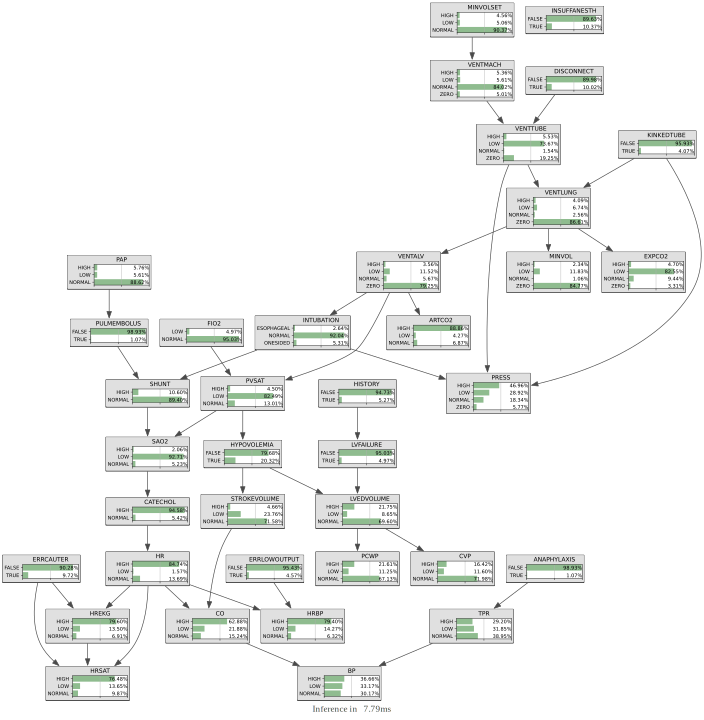

In [10]:
gnb.showInference(bn2,evs={},size="10")

## Two classifiers from the learned BN

In [11]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT:Labelized({HIGH|LOW|NORMAL})
INTUBATION:Labelized({ESOPHAGEAL|NORMAL|ONESIDED})


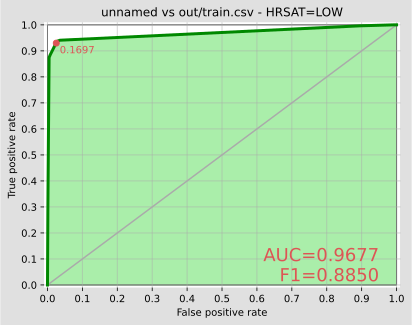

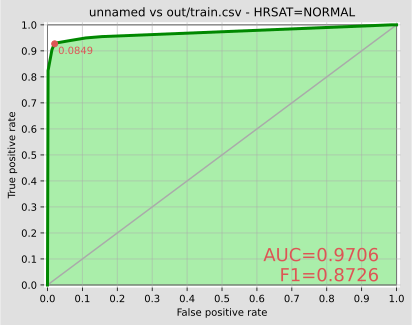

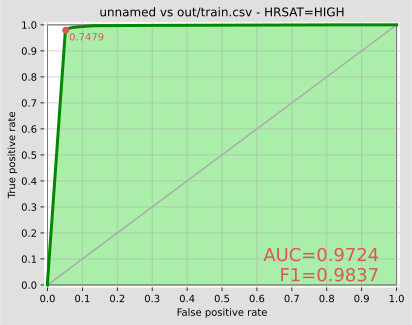

In [12]:
showROC(bn2,"out/train.csv",'HRSAT','LOW',show_progress=False)
showROC(bn2,"out/train.csv",'HRSAT','NORMAL',show_progress=False)
showROC(bn2,"out/train.csv",'HRSAT','HIGH',show_progress=False);

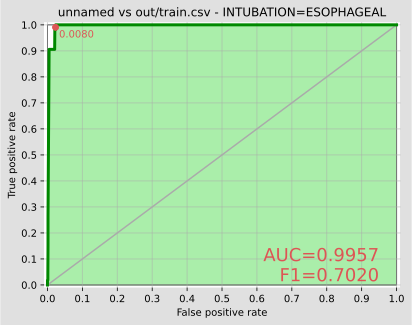

In [13]:
showROC(bn2,"out/train.csv",'INTUBATION',"ESOPHAGEAL",show_progress=False);

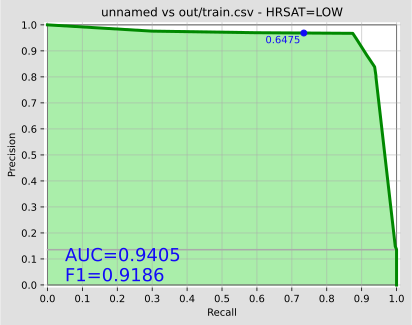

In [14]:
showPR(bn2,"out/train.csv",'HRSAT','LOW',show_progress=False);

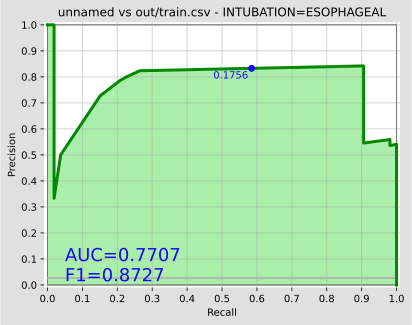

In [15]:
showPR(bn2,"out/train.csv",'INTUBATION',"ESOPHAGEAL",show_progress=False);

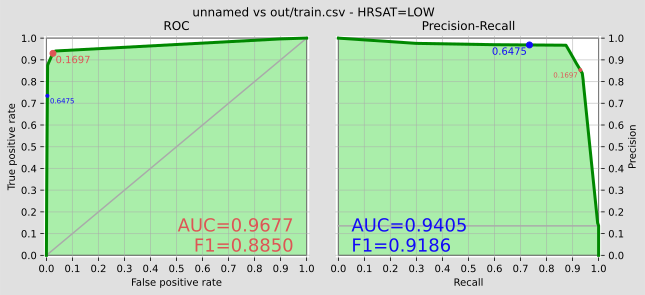

In [16]:
showROC_PR(bn2,"out/train.csv",'HRSAT','LOW',show_progress=False);

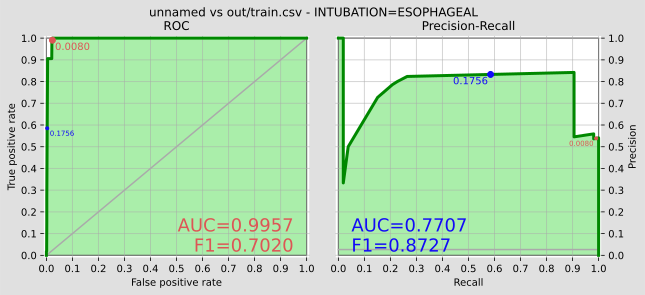

In [17]:
showROC_PR(bn2,"out/train.csv",'INTUBATION',"ESOPHAGEAL",show_progress=False);